**Day 23 – Practical EDA: Applying 7 Core Techniques on a Real Dataset**

**Day 23 – Practical EDA: Applying 7 Core Techniques on a Real Dataset**

Today, we will apply 7 essential EDA techniques to a small dataset.  
This process works whether your dataset has 7 rows or 7 million!

---

**Recap from Day 22**

We learned the theory behind:
1. Variable Identification  
2. Univariate Analysis  
3. Bivariate Analysis  
4. Outlier Detection  
5. Missing Value Treatment  
6. Variable Transformation  
7. Variable Creation

---

**Dataset Preview**

| Name   | Domain           | Age       | Location   | Salary    | Exp        |
|--------|------------------|-----------|------------|-----------|------------|
| Mike   | `Datascience#$`  | 34 years  | Mumbai     | `5^00#0`  | 2+         |
| Teddy^ | Testing          | 45' yr    | Bangalore  | `10%%000` | <3         |
| Umar#r | `Dataanalyst^^#` | NaN       | NaN        | `1$5%000` | 4> yrs     |
| Jane   | `Ana^^lytics`    | NaN       | Hyderbad   | `2000^0`  | NaN        |
| Uttam* | Statistics       | 67-yr     | NaN        | `30000-`  | 5+ year    |
| Kim    | NLP              | 55yr      | Delhi      | `6000^$0` | 10+        |

---



**Load the Dataset**

In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel(r'C:\Users\LAHARI\OneDrive\Desktop\FSDS\EDA\Dataset\Rawdata.xlsx')

**Basic Data Inspection**

In [2]:
df.head()  # Displays the first 5 rows

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year


In [3]:
df.tail()  # Displays the last 5 rows

,Name,Domain,Age,Location,Salary,Exp
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


**Shape and Columns**

In [4]:
df.shape        # Returns (rows, columns)

(6, 6)

In [5]:
df.columns      # Lists all column names

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [6]:
df.info()       # Overview of data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


**Missing Value Check**

In [7]:
df.isnull()     # Returns a DataFrame showing True for missing cells

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [8]:
df.isna()       # Same as isnull(), both can be used interchangeably

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [9]:
df.isnull().sum()   # Total number of missing values in each column

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

**Quick Tip:**

* isnull() and isna() are functionally identical in Pandas.

* Use .sum() to quickly check how many missing values exist column-wise.



**Rename DataFrame**

In [10]:
emp = df  # Now you can use emp instead of df

In [11]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


**Data Cleaning**

**Remove all non-word characters from the 'Name' column**

In [12]:
# Remove all non-word characters from the 'Name' column
emp['Name'] = emp['Name'].str.replace(r'\W', '', regex=True)

In [13]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy,Testing,45' yr,Bangalore,10%%000,<3
2,Umar,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


``` python 

.str.replace(r'\W', '', regex=True) means:

\W → Matches anything that is NOT a letter, number, or underscore

Removes special characters like @, #, !, spaces, etc.

Keeps only letters, digits, and underscores

**Clean Domain Column**

In [14]:
# Clean Domain Column
emp['Domain'] = emp['Domain'].str.replace(r'\W', '', regex=True)
# Removes symbols like #$%^ from the domain field

In [15]:
emp['Domain']

0    Datascience
1        Testing
2    Dataanalyst
3      Analytics
4     Statistics
5            NLP
Name: Domain, dtype: object

**Clean and Extract Numbers from Age Column**

In [16]:
# Remove non-word characters
emp['Age'] = emp['Age'].str.replace(r'\W', '', regex=True)

# Extract numeric part from age using regex
emp['Age'] = emp['Age'].str.extract(r'(\d+)')

In [17]:
emp['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

``` python 

`(\d+)` explanation:

\d → digit (0–9)

+ → one or more digits

() → capture only the number part
This extracts numbers like 34 from values like '34 years', '67-yr', etc.

**Clean Location Column**

In [19]:
emp['Location'] = emp['Location'].str.replace(r'\W', '', regex=True)

**Clean Salary Column**

In [20]:
emp['Salary'] = emp['Salary'].str.replace(r'\W', '', regex=True)

**Extract Experience from Exp Column**

In [21]:
emp['Exp'] = emp['Exp'].str.extract(r'(\d+)')
# Gets numeric part from values like 2+, 4> yrs, 5+ year

In [22]:
clean_data = emp.copy()

# EDA Technique

**Handle Missing Values in 'Age' Column**

In [23]:
import numpy as np
import pandas as pd

# If 'Age' is not yet numeric, convert it
clean_data['Age'] = pd.to_numeric(clean_data['Age'])

# Fill missing Age values with the mean of the column
clean_data['Age'] = clean_data['Age'].fillna(np.mean(clean_data['Age']))


**Handle Missing Values in 'Exp' Column**

In [24]:
clean_data['Exp'] = pd.to_numeric(clean_data['Exp'])  # Ensure it's numeric
clean_data['Exp'] = clean_data['Exp'].fillna(np.mean(clean_data['Exp']))

**Handle Missing Values in 'Location' Column (Categorical)**

In [26]:
# Fill missing Location values with the most frequent value (mode)
clean_data['Location'] = clean_data['Location'].fillna(clean_data['Location'].mode()[0])

**Convert Data Types**

After cleaning, we should convert data types to appropriate formats for better performance and memory usage.

In [27]:
# Convert numeric columns to int
clean_data['Age'] = clean_data['Age'].astype(int)
clean_data['Exp'] = clean_data['Exp'].astype(int)
clean_data['Salary'] = clean_data['Salary'].astype(int)

# Convert object columns with limited unique values to category
clean_data['Name'] = clean_data['Name'].astype('category')
clean_data['Domain'] = clean_data['Domain'].astype('category')
clean_data['Location'] = clean_data['Location'].astype('category')

**Final Check: Data Summary**

In [28]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int64   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int64   
 5   Exp       6 non-null      int64   
dtypes: category(3), int64(3)
memory usage: 938.0 bytes


**Save Cleaned Data to CSV**

In [29]:
clean_data.to_csv('Clean_data.csv', index=False)

In [30]:
# Check your current working directory using:
import os
os.getcwd()

'c:\\Users\\LAHARI\\AppData\\Local\\Programs\\Microsoft VS Code'

In [31]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Univariate Visualization**

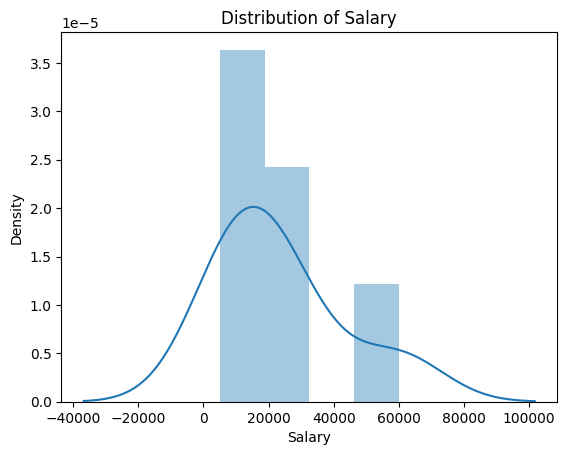

In [32]:
# Distribution Plot – Salary
sns.distplot(clean_data['Salary'])  # KDE + Histogram
plt.title("Distribution of Salary")
plt.show()

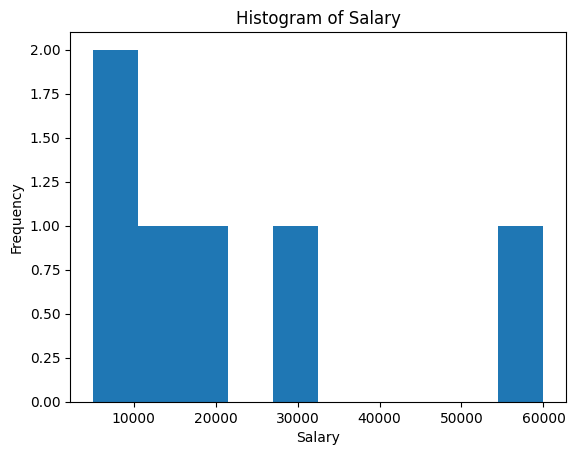

In [33]:
# Histogram – Salary
plt.hist(clean_data['Salary'])
plt.title("Histogram of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

**Bivariate Visualization**

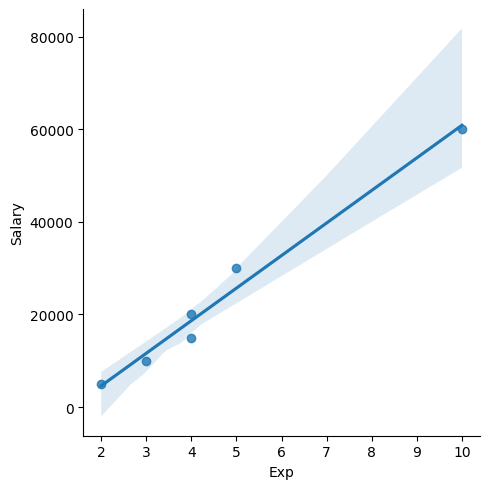

In [34]:
# Scatter Plot with Regression Line – Exp vs Salary
sns.lmplot(data=clean_data, x='Exp', y='Salary')  # Includes regression line

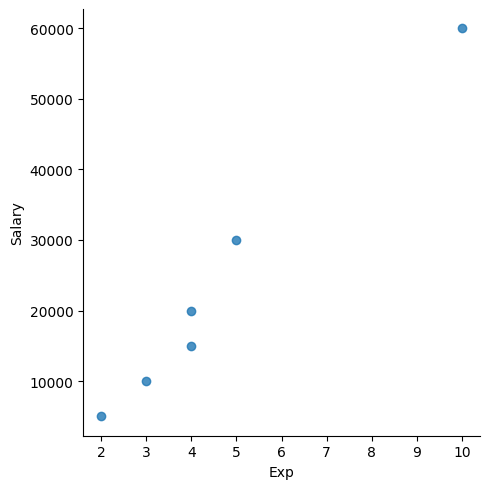

In [35]:
# Scatter Plot without Regression Line – Exp vs Salary
sns.lmplot(data=clean_data, x='Exp', y='Salary', fit_reg=False)

**Slicing and Indexing**

In [36]:
clean_data[:]        # All rows

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [37]:
clean_data[0:6:2]    # Every second row from first 6

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
2,Umar,Dataanalyst,50,Bangalore,15000,4
4,Uttam,Statistics,67,Bangalore,30000,5


In [38]:
clean_data[::-1]     # Reverse order of rows

,Name,Domain,Age,Location,Salary,Exp
5,Kim,NLP,55,Delhi,60000,10
4,Uttam,Statistics,67,Bangalore,30000,5
3,Jane,Analytics,50,Hyderbad,20000,4
2,Umar,Dataanalyst,50,Bangalore,15000,4
1,Teddy,Testing,45,Bangalore,10000,3
0,Mike,Datascience,34,Mumbai,5000,2


**Splitting Features (X_iv) and Target (y_dv)**

In [39]:
X_iv = clean_data[['Name', 'Domain', 'Age', 'Location', 'Exp']]  # Independent variables

In [40]:
X_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [41]:
y_dv = clean_data[['Salary']]                                     # Dependent variable

In [42]:
y_dv

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


**One-Hot Encoding for Categorical Variables**

In [43]:
imputation = pd.get_dummies(clean_data)  # Converts categories to 0/1 columns

In [44]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1,45,10000,3,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
2,50,15000,4,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
3,50,20000,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,67,30000,5,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False
5,55,60000,10,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False


**We’re now ready to move on to model building, feature selection, and machine learning in the next phase.**